In [40]:
import keras
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import GaussianNoise,Dense,Flatten,Reshape
import tensorflow as tf
import matplotlib.pyplot as plt


In [41]:
(X_train,_),(X_test,_) = tf.keras.datasets.mnist.load_data() 

In [42]:
print(X_train.shape)

(60000, 28, 28)


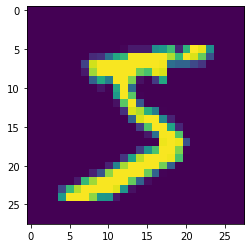

In [43]:
X_train = X_train/255.
X_test = X_test/255.

plt.imshow(X_train[0])

In [44]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [45]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [46]:
autoEncoder = Sequential([encoder,decoder])


In [47]:
autoEncoder.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer=SGD(lr=1.5))

In [48]:
autoEncoder.fit(X_train,X_train,epochs=5,validation_data = [X_test,X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 18s 298us/step - loss: 0.2503 - accuracy: 0.7914 - val_loss: 0.2134 - val_accuracy: 0.7939
Epoch 2/5
60000/60000 [==============================] - 18s 292us/step - loss: 0.1895 - accuracy: 0.7977 - val_loss: 0.1668 - val_accuracy: 0.8002
Epoch 3/5
60000/60000 [==============================] - 17s 290us/step - loss: 0.1613 - accuracy: 0.8020 - val_loss: 0.1504 - val_accuracy: 0.8042
Epoch 4/5
60000/60000 [==============================] - 17s 290us/step - loss: 0.1475 - accuracy: 0.8046 - val_loss: 0.1401 - val_accuracy: 0.8063
Epoch 5/5
60000/60000 [==============================] - 17s 292us/step - loss: 0.1388 - accuracy: 0.8062 - val_loss: 0.1333 - val_accuracy: 0.8065


In [60]:
passed_images = autoEncoder.predict(X_test)

Original Image


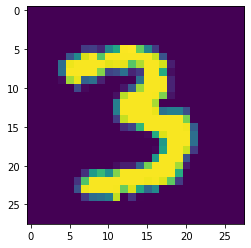

Recreated Image


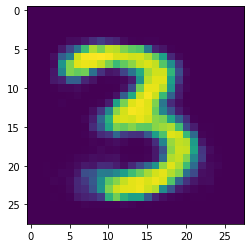

In [61]:
n=500

print("Original Image")
plt.imshow(X_test[n])
plt.show()
print("Recreated Image")
plt.imshow(passed_images[n])
plt.show()

In [62]:
sample = GaussianNoise(0.2)

In [63]:
data = tf.convert_to_tensor(X_test[:10],dtype='float32')

In [73]:

noise = sample(data,training=True)
print(np.array(noise[0]))

NotImplementedError: Cannot convert a symbolic Tensor (strided_slice_5:0) to a numpy array.

Original


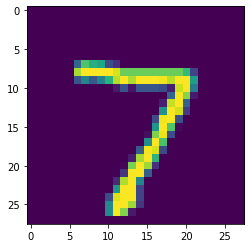

Noised


NotImplementedError: Cannot convert a symbolic Tensor (strided_slice_3:0) to a numpy array.

In [65]:
n = 0
print("Original")
plt.imshow(X_test[n])
plt.show()
print("Noised")
noised = noise[n]
plt.imshow(noised)
plt.show()

In [74]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.1))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [75]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [76]:
NoiseRemover = Sequential([encoder,decoder])

In [77]:
NoiseRemover.compile(loss='binary_crossentropy',optimizer=SGD(lr=0.5),metrics=['accuracy'])

In [ ]:
NoiseRemover.fit(X_train,X_train,epochs=15)

Epoch 1/15
60000/60000 [==============================] - 17s 276us/step - loss: 0.2800 - accuracy: 0.7879
Epoch 2/15
60000/60000 [==============================] - 16s 271us/step - loss: 0.2349 - accuracy: 0.7945
Epoch 3/15
60000/60000 [==============================] - 16s 273us/step - loss: 0.2037 - accuracy: 0.7949
Epoch 4/15
60000/60000 [==============================] - 17s 276us/step - loss: 0.1767 - accuracy: 0.7989
Epoch 5/15
60000/60000 [==============================] - 17s 276us/step - loss: 0.1614 - accuracy: 0.8019
Epoch 6/15
60000/60000 [==============================] - 17s 279us/step - loss: 0.1516 - accuracy: 0.8040
Epoch 7/15
60000/60000 [==============================] - 17s 279us/step - loss: 0.1456 - accuracy: 0.8052
Epoch 8/15
60000/60000 [==============================] - 17s 278us/step - loss: 0.1415 - accuracy: 0.8059
Epoch 9/15
60000/60000 [==============================] - 17s 279us/step - loss: 0.1379 - accuracy: 0.8066
Epoch 10/15
55488/60000 [============

In [ ]:
denoised = NoiseRemover(noise)
print(denoised)

In [ ]:
n=0
print("Original")
plt.imshow(X_test[n])
plt.show()
print("Noise Added")
plt.imshow(noise[n])
plt.show()
print("After")
new = np.array(noise)
plt.imshow((new[n]))
plt.show()